In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('IMDB Dataset.csv')

In [3]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

In [5]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=200)

In [19]:
def build_model(model_type='DNN'):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(10000, 128, input_length=200))
    
    if model_type == 'DNN':
        model.add(tf.keras.layers.Flatten())
        
    else:
        model.add(tf.keras.layers.Conv1D(128, 5, activation='relu'))
        model.add(tf.keras.layers.GlobalMaxPooling1D())
        
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [7]:
dnn_model = build_model('DNN')
dnn_history = dnn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))



Epoch 1/5


625/625 [==============================] - 19s 29ms/step - loss: 0.3669 - accuracy: 0.8245 - val_loss: 0.2785 - val_accuracy: 0.8810
Epoch 2/5
625/625 [==============================] - 18s 29ms/step - loss: 0.0804 - accuracy: 0.9731 - val_loss: 0.3975 - val_accuracy: 0.8592
Epoch 3/5
625/625 [==============================] - 18s 28ms/step - loss: 0.0126 - accuracy: 0.9963 - val_loss: 0.5271 - val_accuracy: 0.8696
Epoch 4/5
625/625 [==============================] - 18s 28ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.5820 - val_accuracy: 0.8734
Epoch 5/5
625/625 [==============================] - 18s 29ms/step - loss: 1.6714e-04 - accuracy: 1.0000 - val_loss: 0.6046 - val_accuracy: 0.8732


In [8]:
cnn_model = build_model('CNN')
cnn_history = cnn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
625/625 [==============================] - 19s 29ms/step - loss: 0.3632 - accuracy: 0.8292 - val_loss: 0.2426 - val_accuracy: 0.8989
Epoch 2/5
625/625 [==============================] - 18s 29ms/step - loss: 0.1576 - accuracy: 0.9414 - val_loss: 0.2411 - val_accuracy: 0.9015
Epoch 3/5
625/625 [==============================] - 18s 29ms/step - loss: 0.0462 - accuracy: 0.9874 - val_loss: 0.2938 - val_accuracy: 0.8991
Epoch 4/5
625/625 [==============================] - 18s 29ms/step - loss: 0.0082 - accuracy: 0.9990 - val_loss: 0.3677 - val_accuracy: 0.8999
Epoch 5/5
625/625 [==============================] - 18s 29ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3934 - val_accuracy: 0.9019


In [20]:
print("DNN Accuracy:", dnn_model.evaluate(X_test, y_test))
print("CNN Accuracy:", cnn_model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.6046 - accuracy: 0.8732
DNN Accuracy: [0.6045719385147095, 0.873199999332428]
313/313 [==============================] - 1s 3ms/step - loss: 0.3934 - accuracy: 0.9019
CNN Accuracy: [0.3933963179588318, 0.9018999934196472]


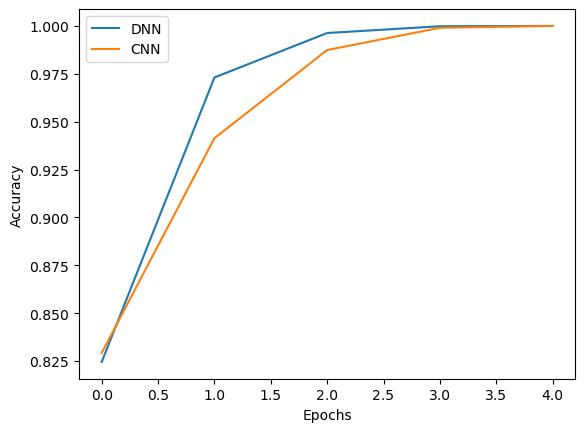

In [10]:
plt.plot(dnn_history.history['accuracy'], label='DNN')
plt.plot(cnn_history.history['accuracy'], label='CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
def predict_sentiment(model, text):
    seq = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=200)
    prediction = model.predict(seq)
    return "Positive" if prediction > 0.5 else "Negative"

test_text = "The movie was absolutely meh, I hated it!"
print("DNN Prediction:", predict_sentiment(dnn_model, test_text))
print("CNN Prediction:", predict_sentiment(cnn_model, test_text))

1/1 [==============================] - 0s 24ms/step
DNN Prediction: Negative
1/1 [==============================] - 0s 20ms/step
CNN Prediction: Negative


In [18]:
dnn_predictions = (dnn_model.predict(X_test) > 0.5).astype("int32")
cnn_predictions = (cnn_model.predict(X_test) > 0.5).astype("int32")

print("DNN Classification Report:\n", classification_report(y_test, dnn_predictions))
print("CNN Classification Report:\n", classification_report(y_test, cnn_predictions))


313/313 [==============================] - 1s 3ms/step
DNN Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      4961
           1       0.87      0.88      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

CNN Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      4961
           1       0.90      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

